Epoch 1/50
235/235 [==============================] - 5s 17ms/step - loss: 0.2133 - val_loss: 0.1360
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1186 - val_loss: 0.1031
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0964 - val_loss: 0.0891
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0857 - val_loss: 0.0813
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0798 - val_loss: 0.0770
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0762 - val_loss: 0.0743
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0739 - val_loss: 0.0725
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0722 - val_loss: 0.0710
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0701 - val_loss: 0.

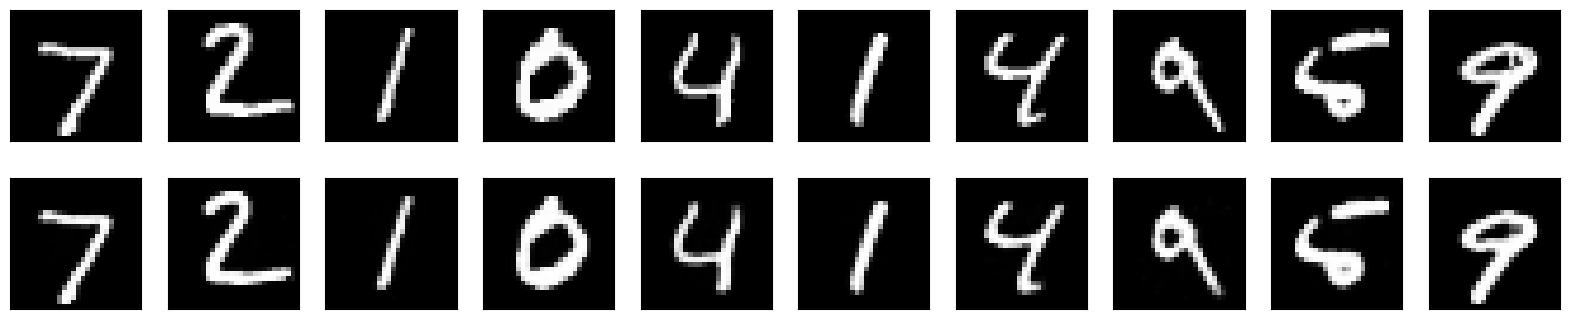

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode the test images
decoded_imgs = autoencoder.predict(x_test)

# Display a few example images before and after compression
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
